Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)


C:\Users\bml05\AppData\Local\Temp\ipykernel_14780\3917948940.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16,8))


(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)
(256,)


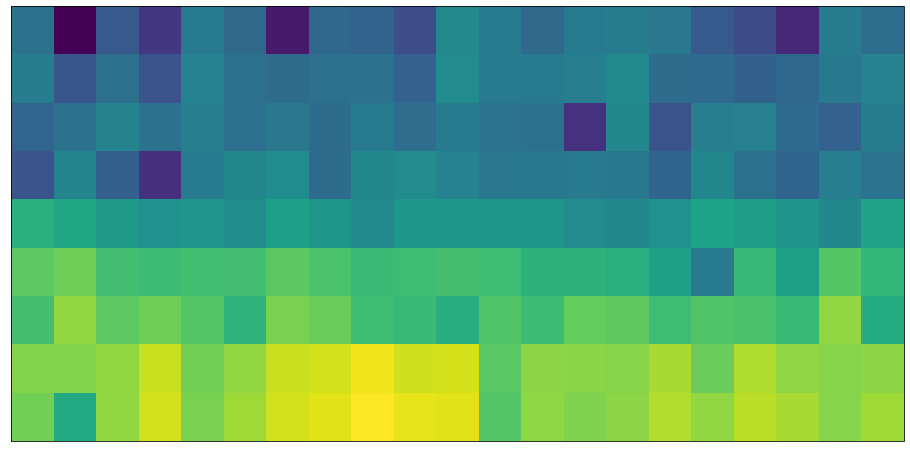

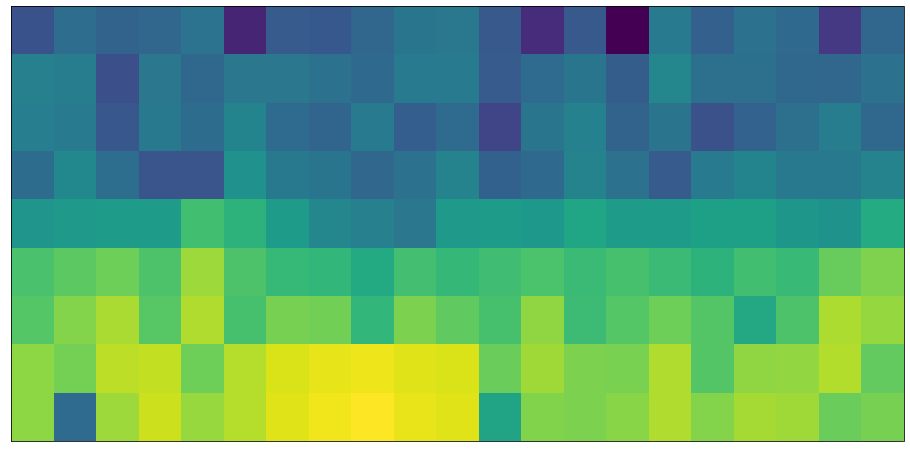

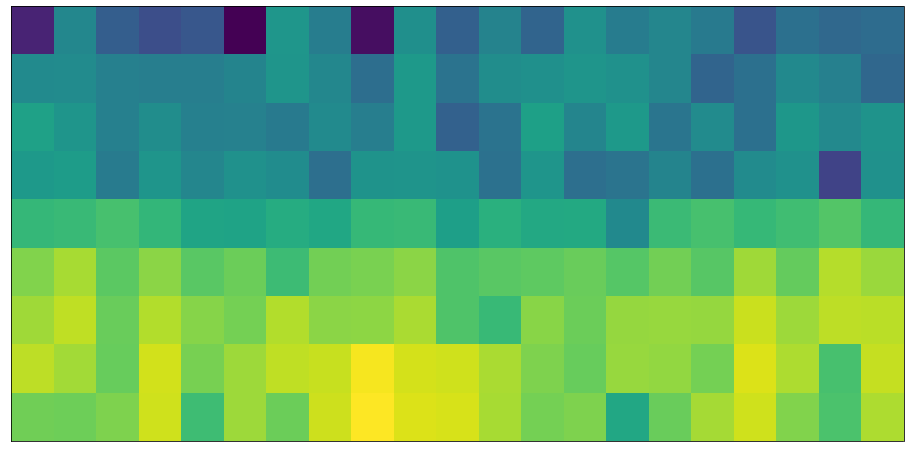

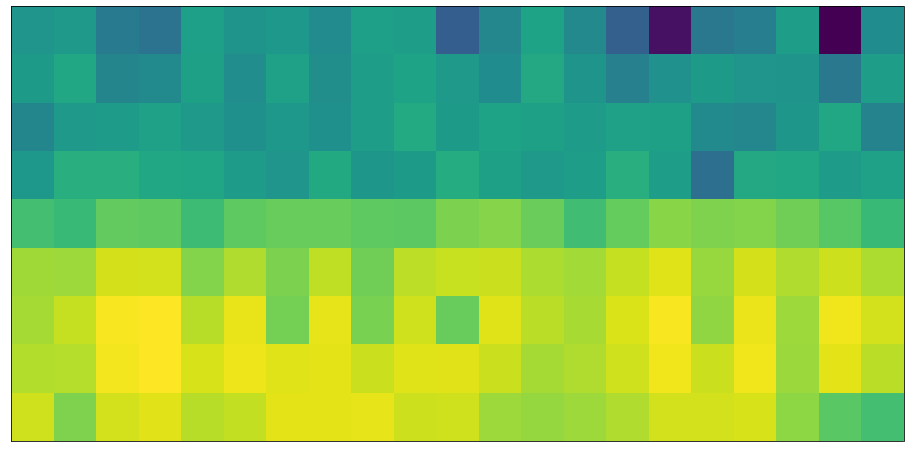

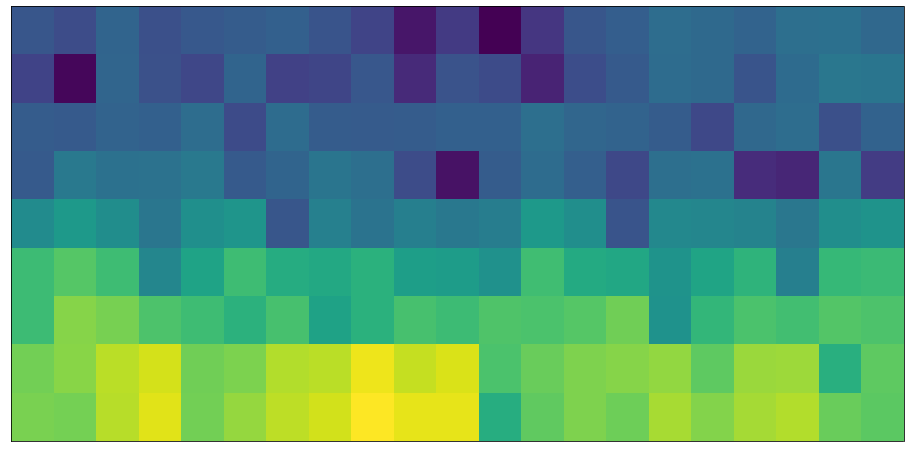

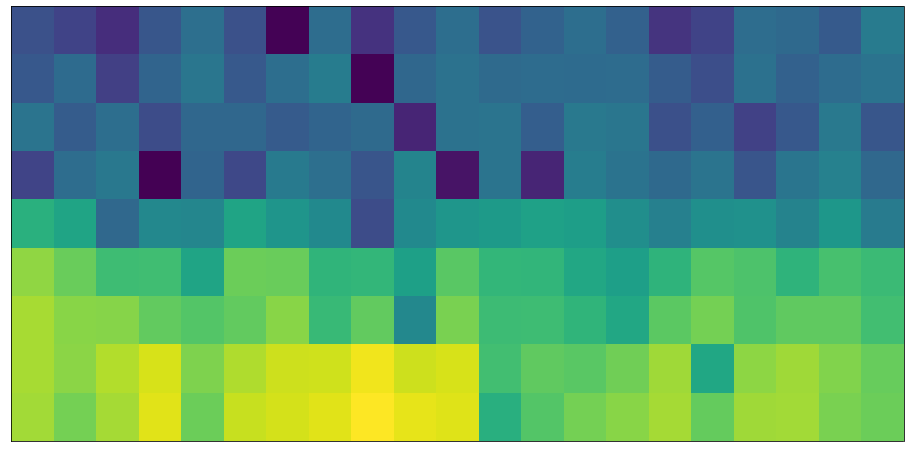

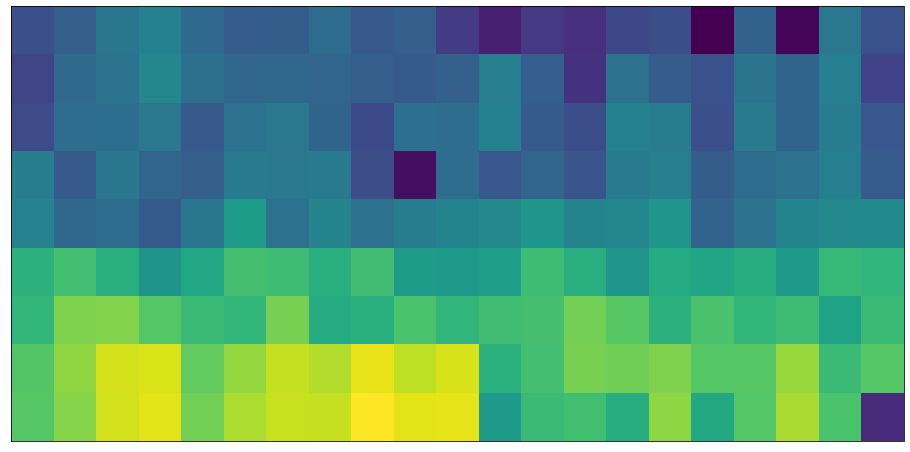

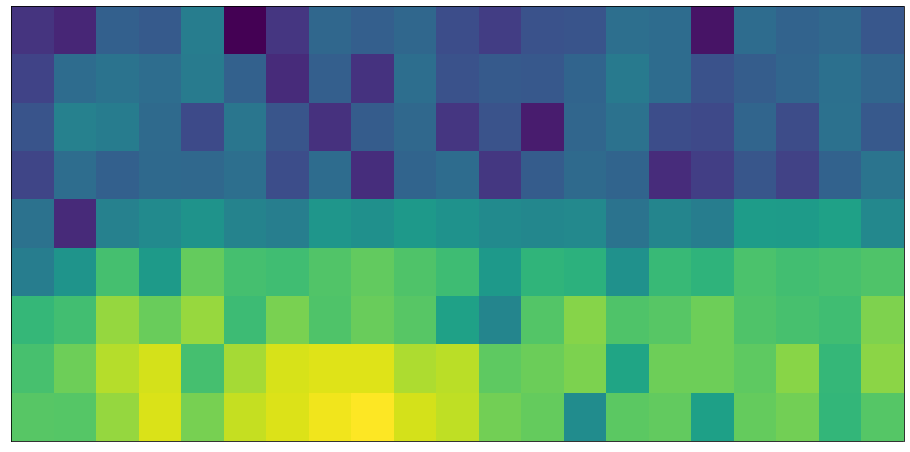

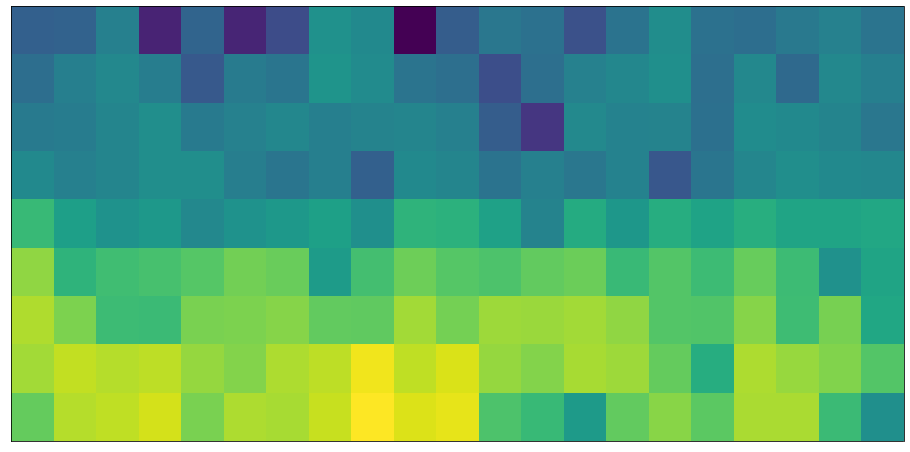

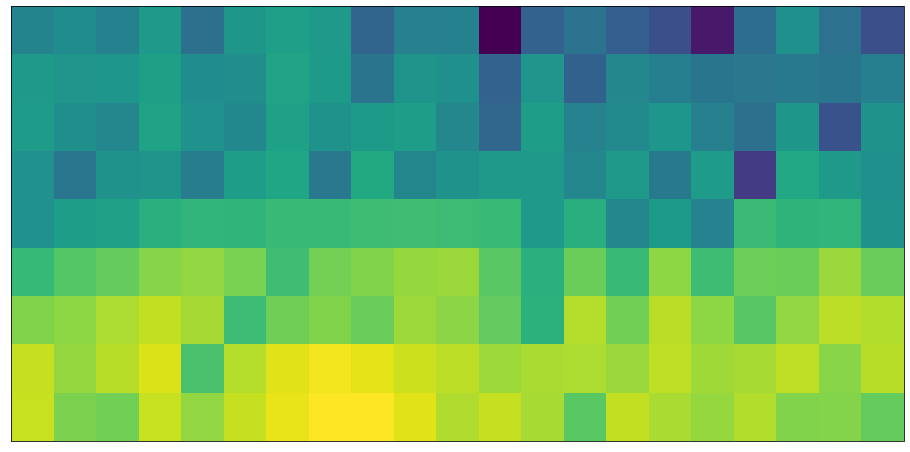

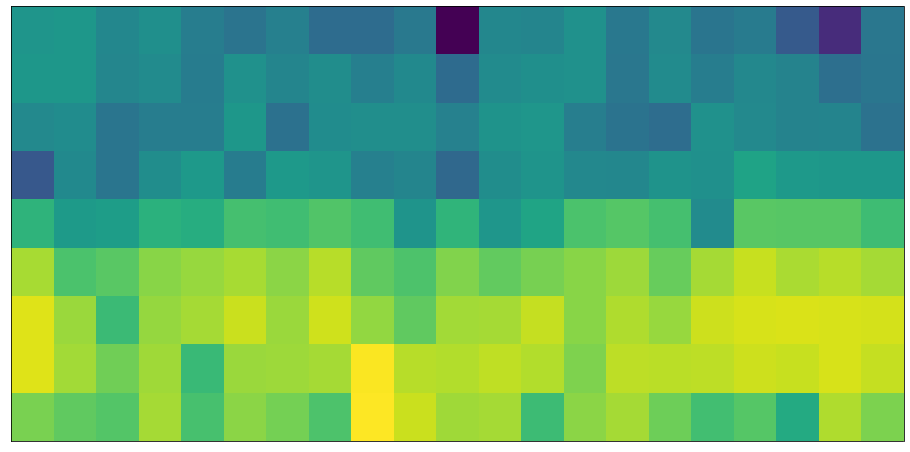

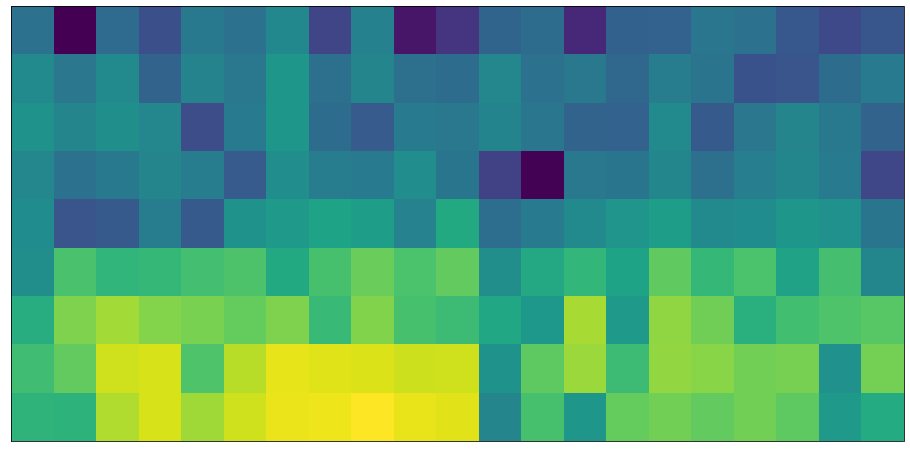

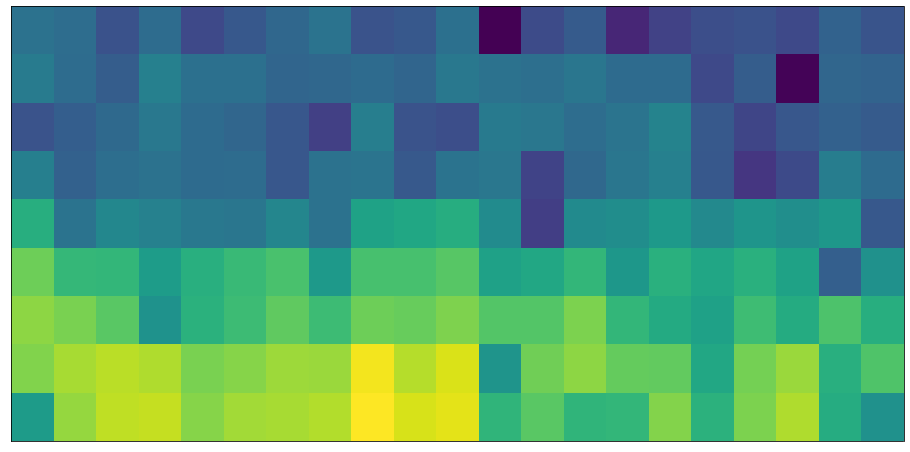

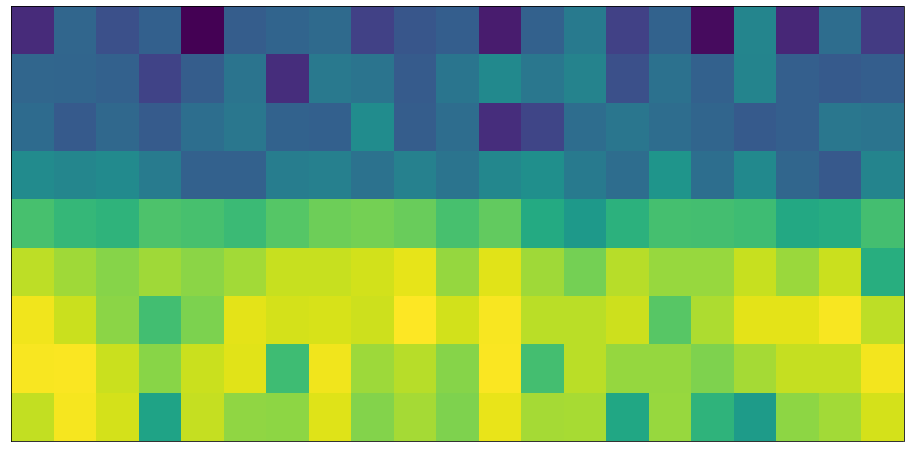

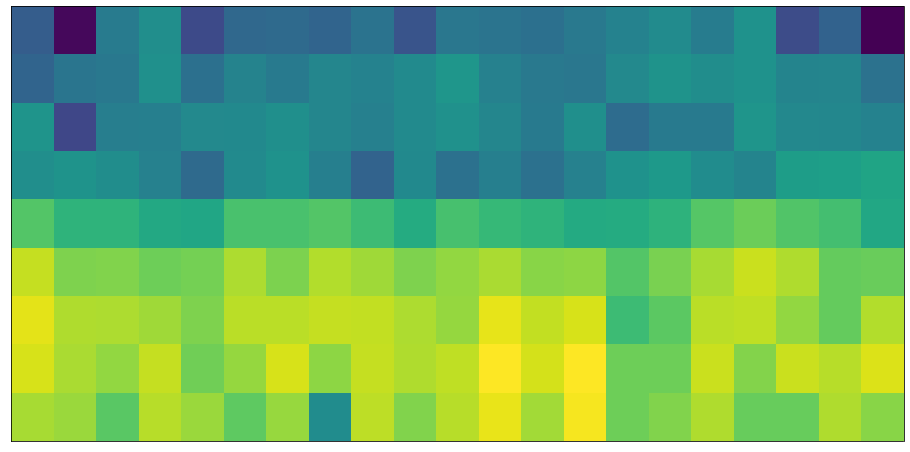

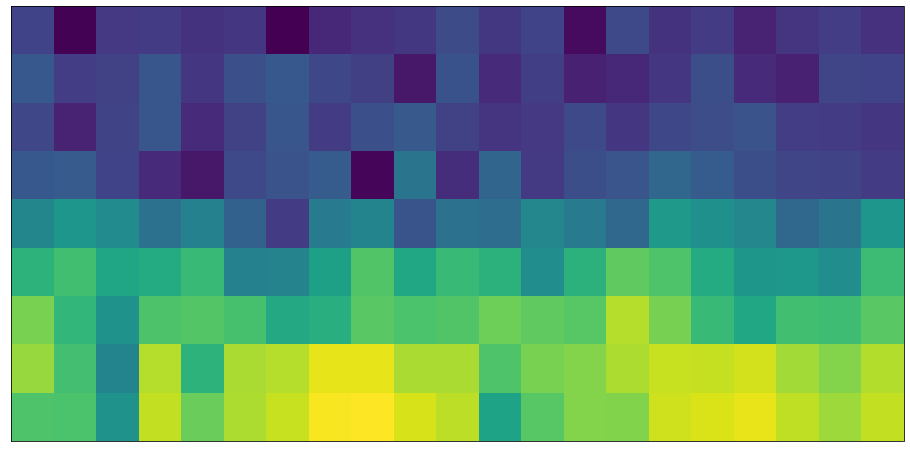

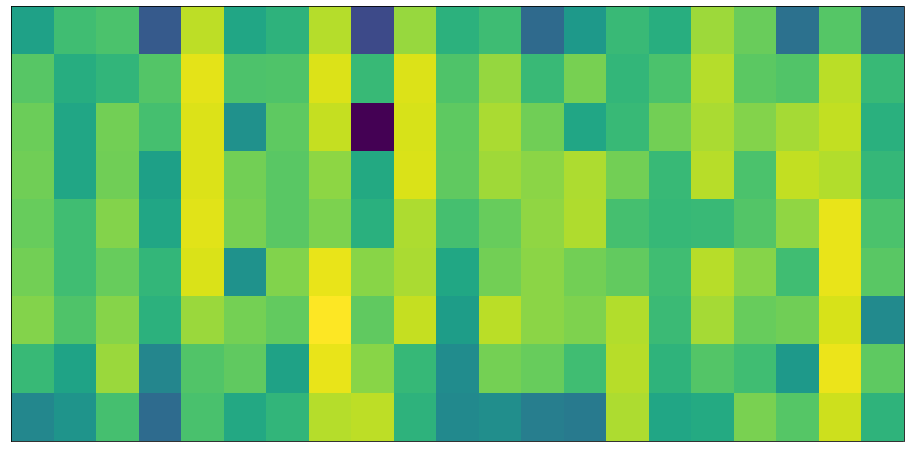

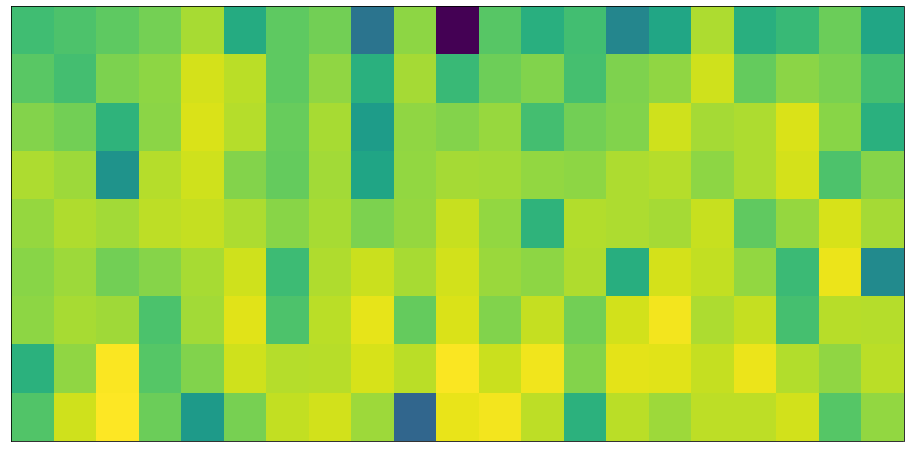

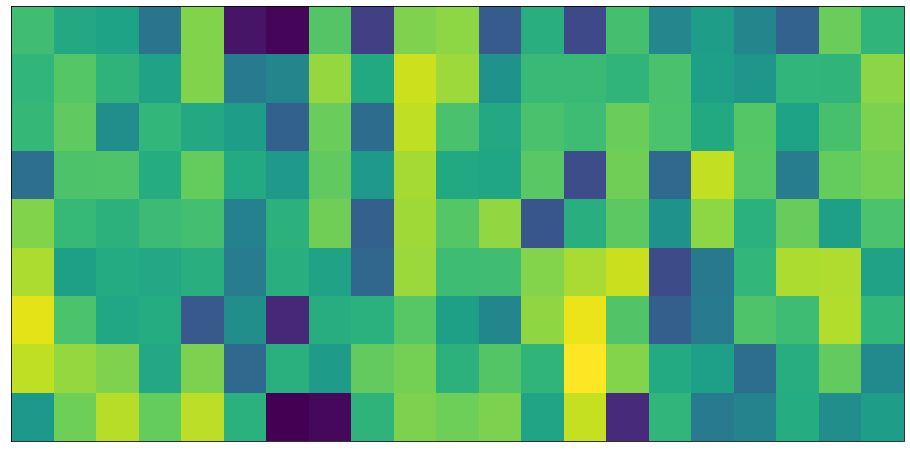

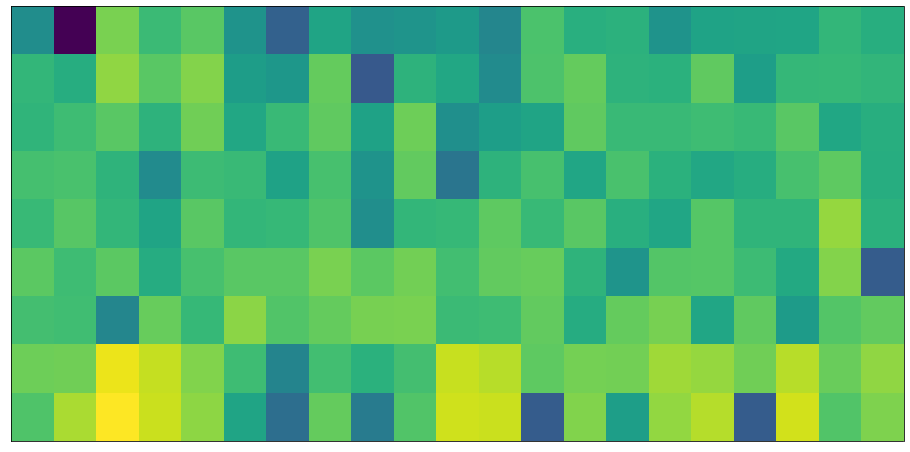

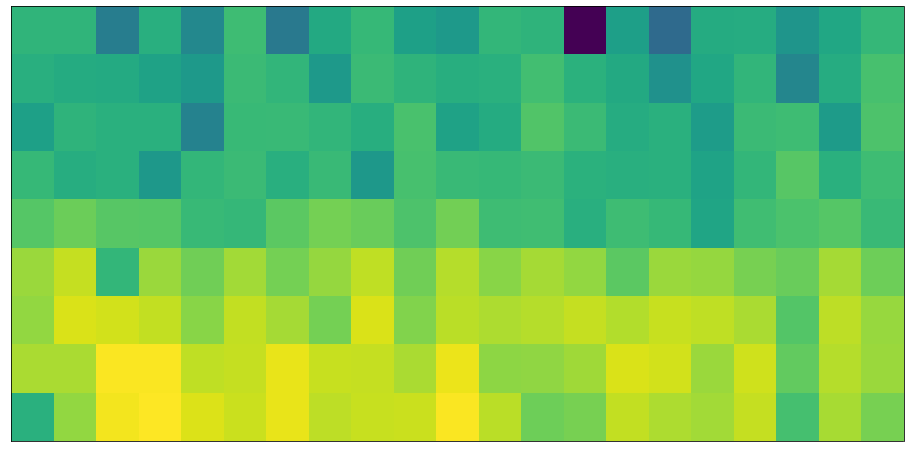

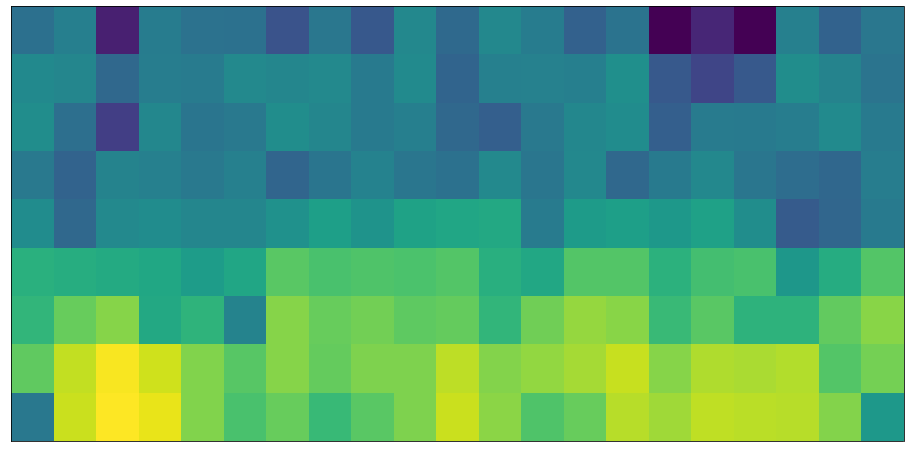

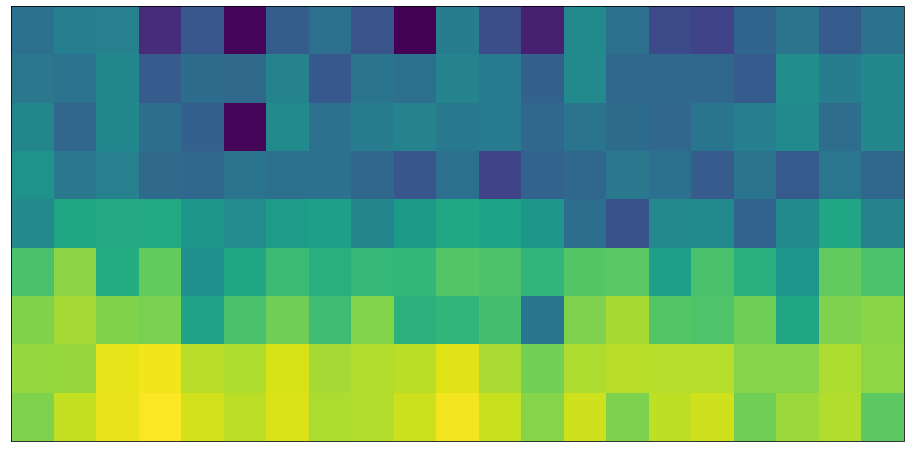

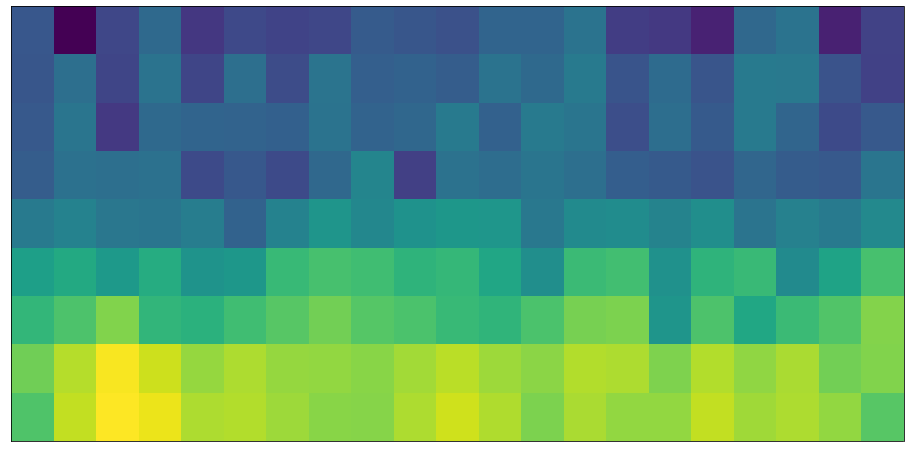

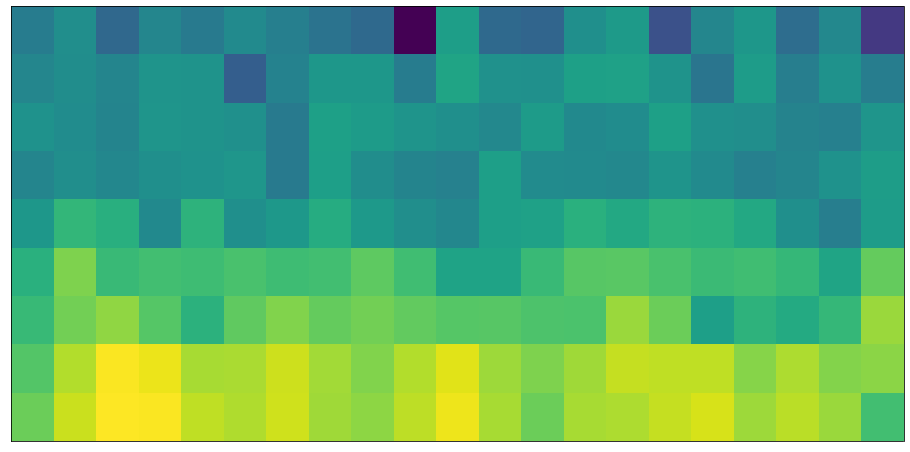

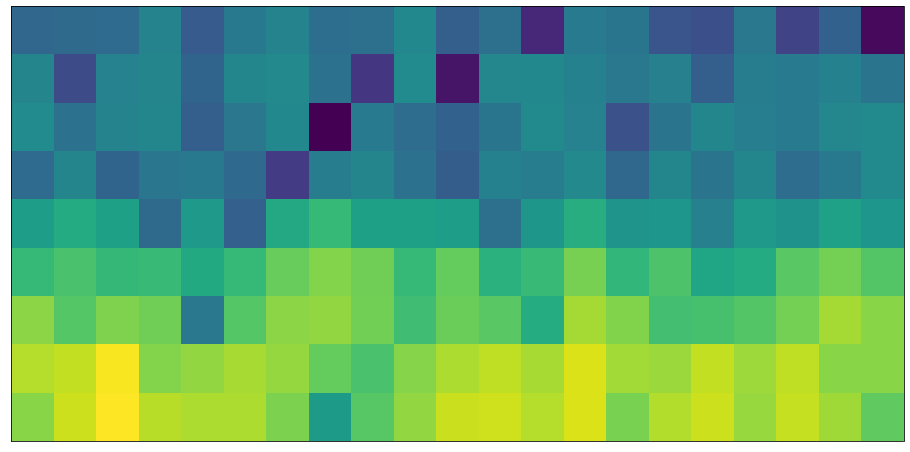

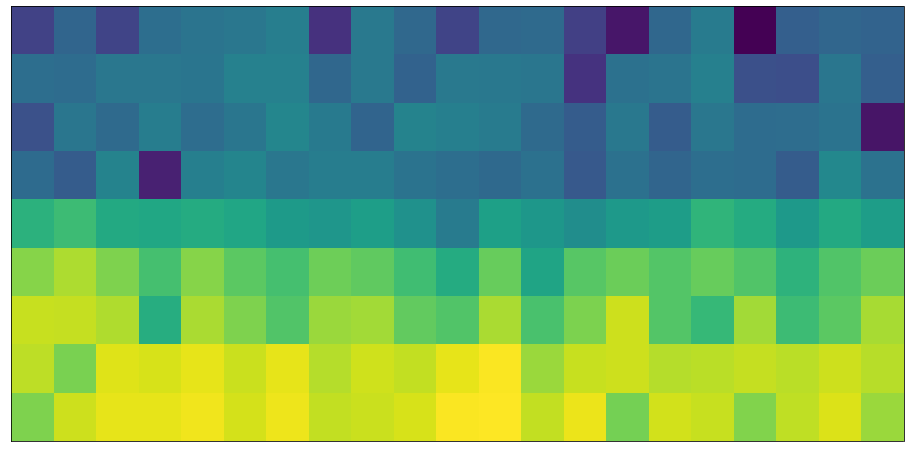

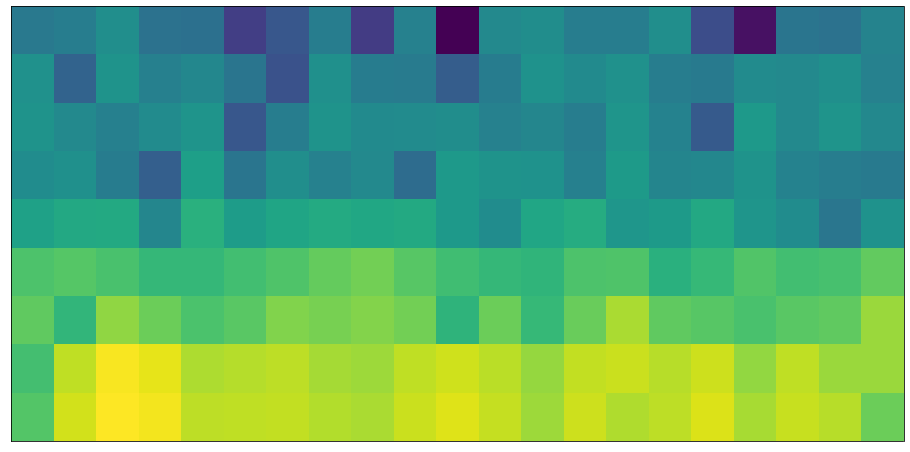

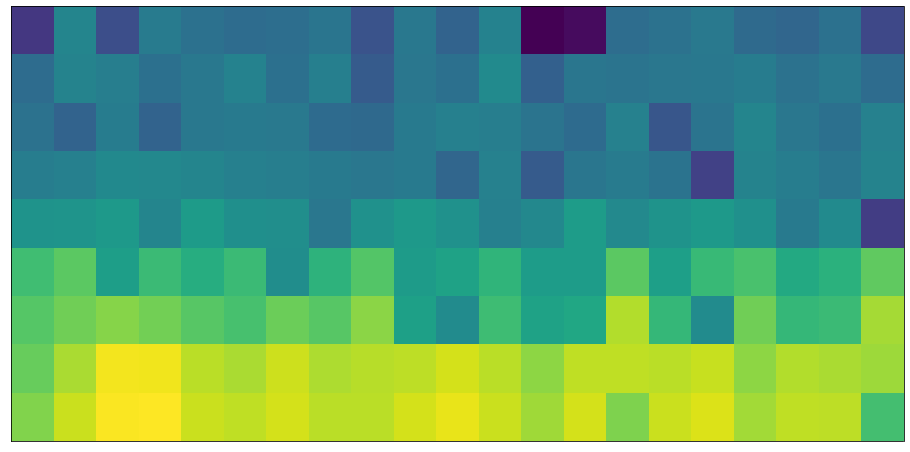

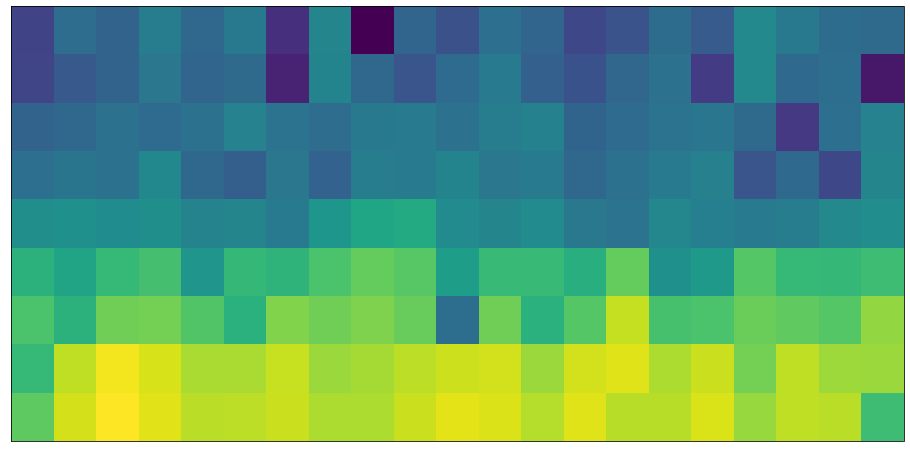

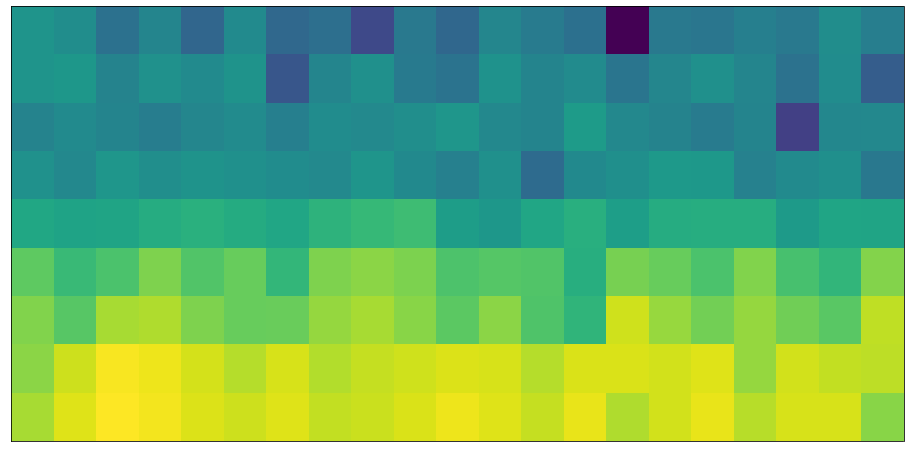

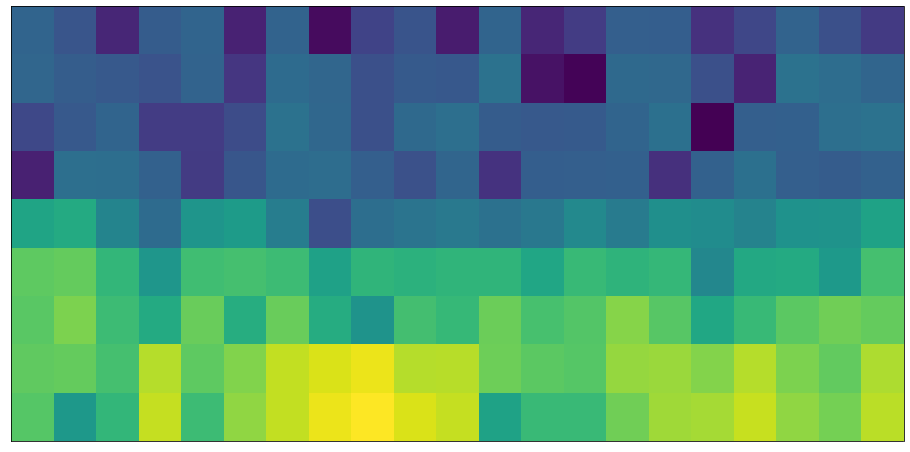

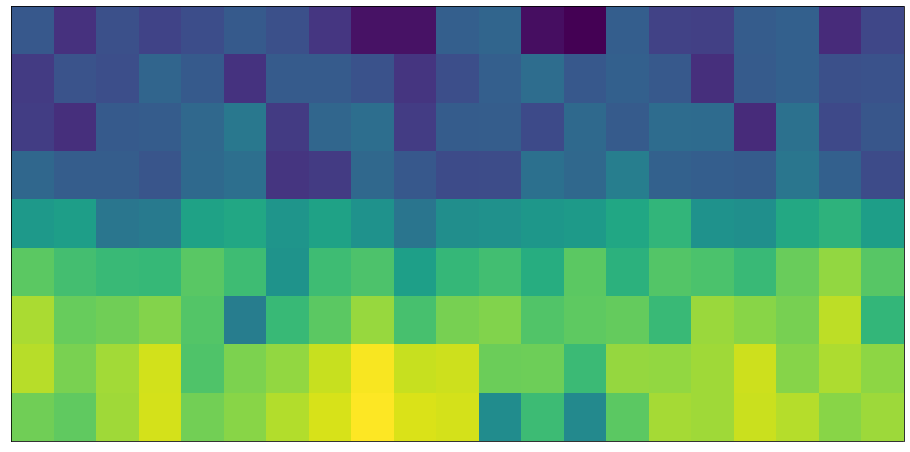

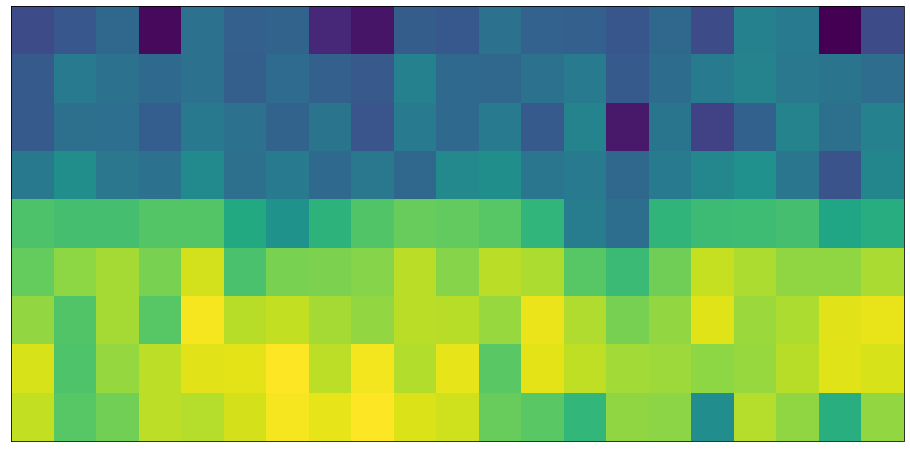

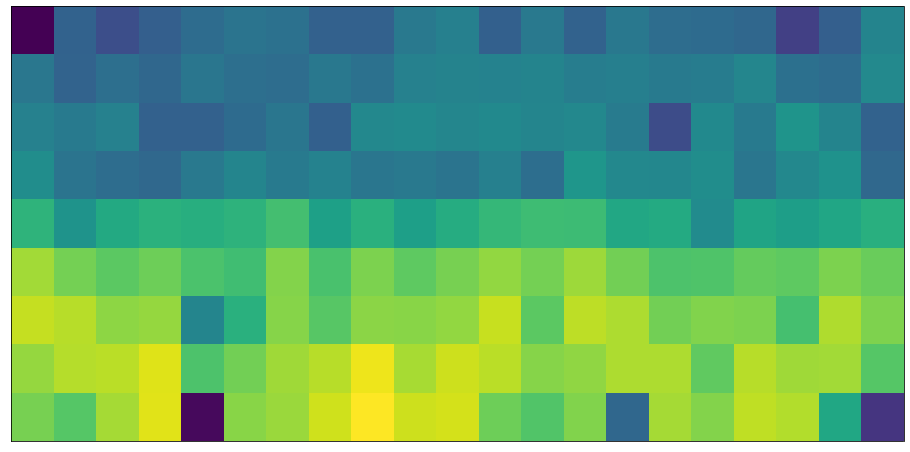

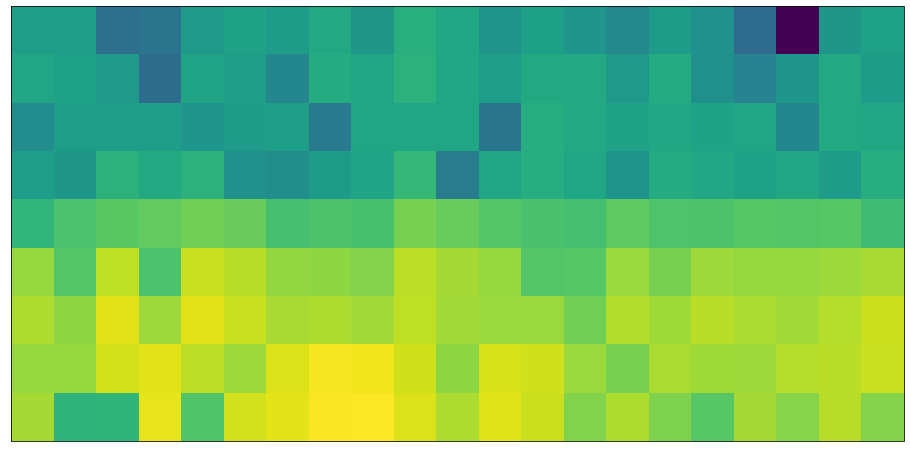

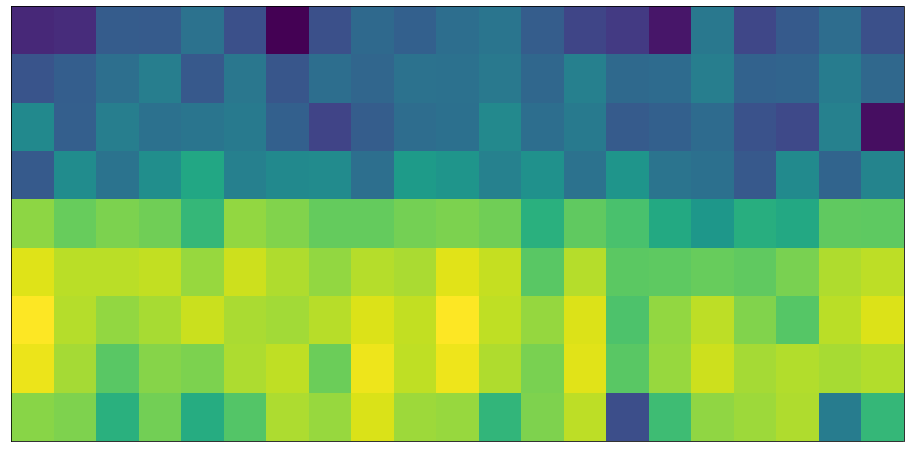

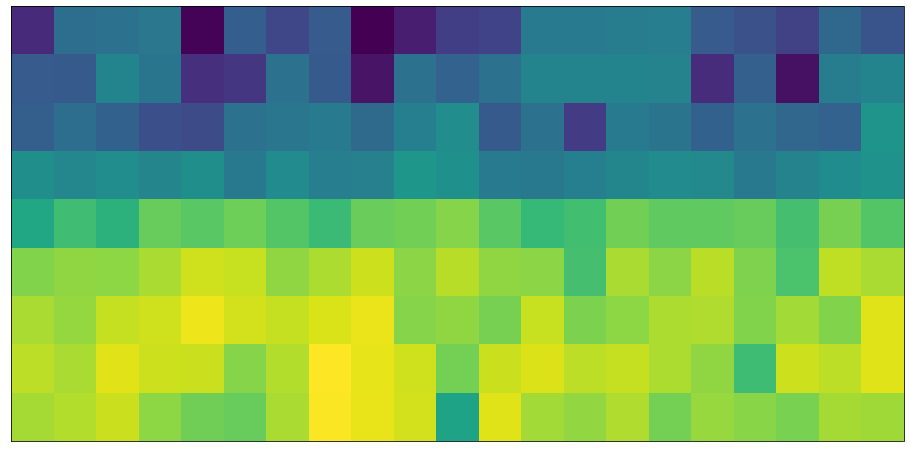

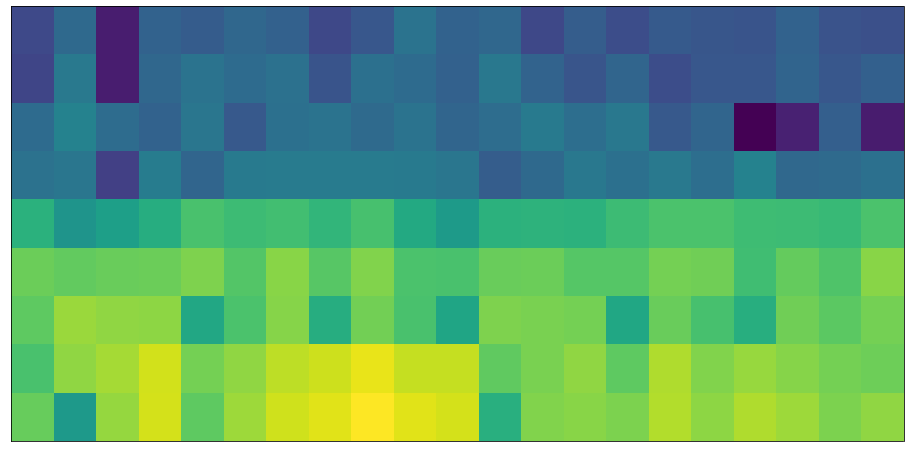

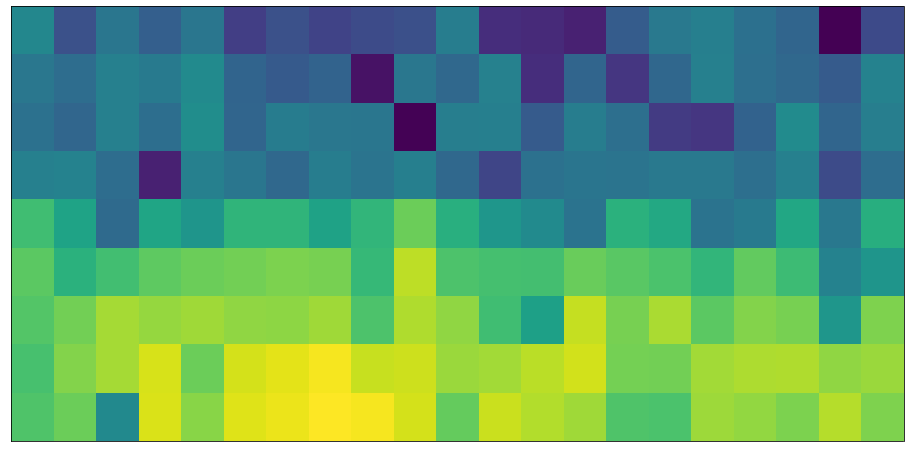

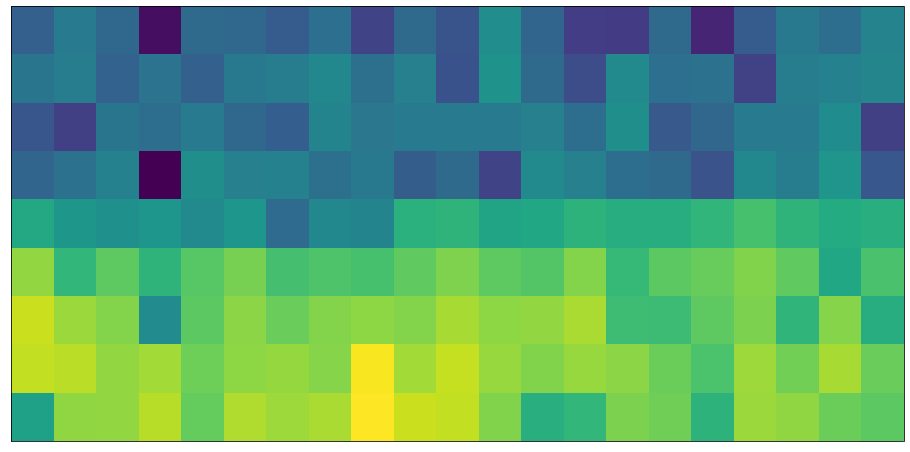

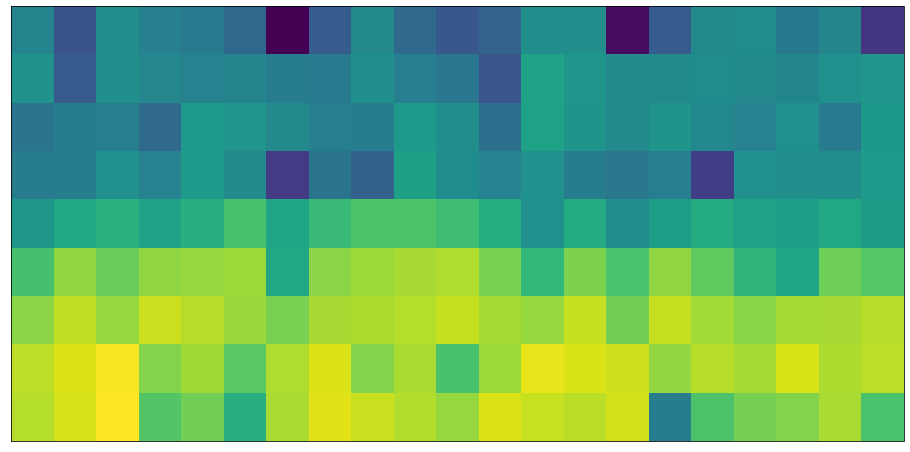

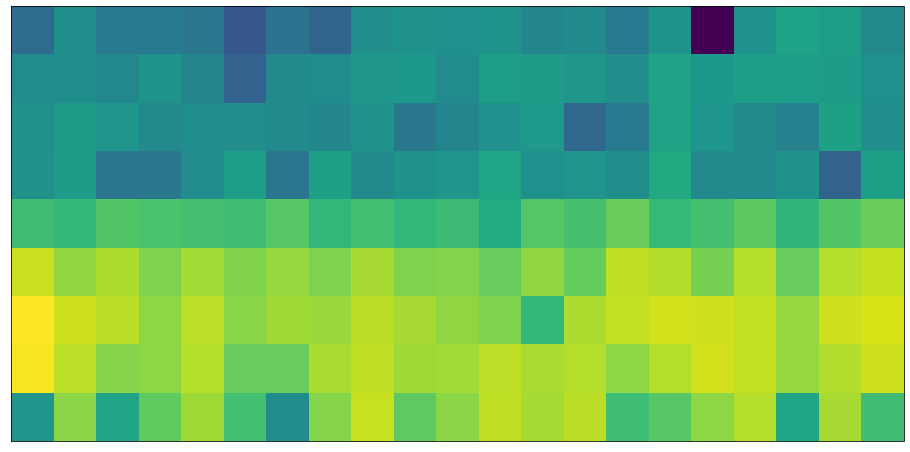

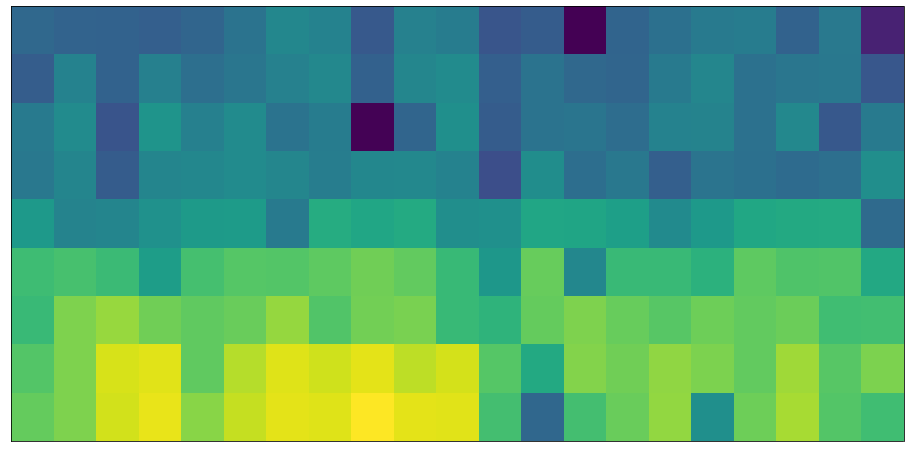

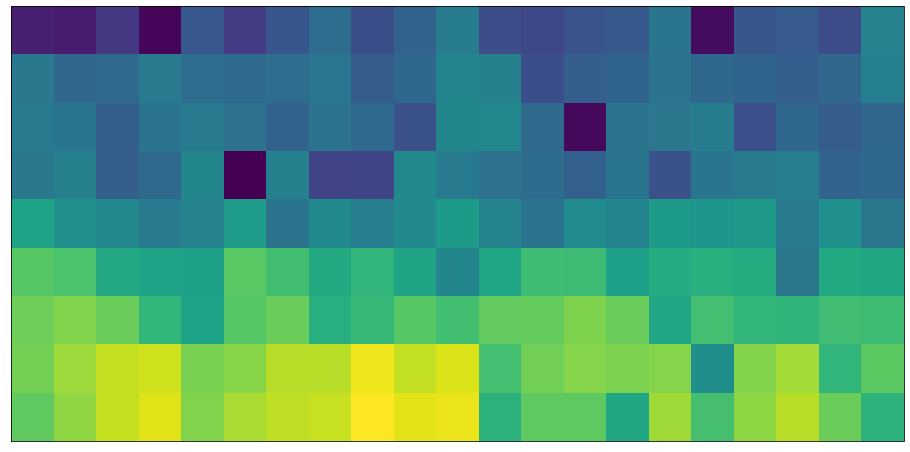

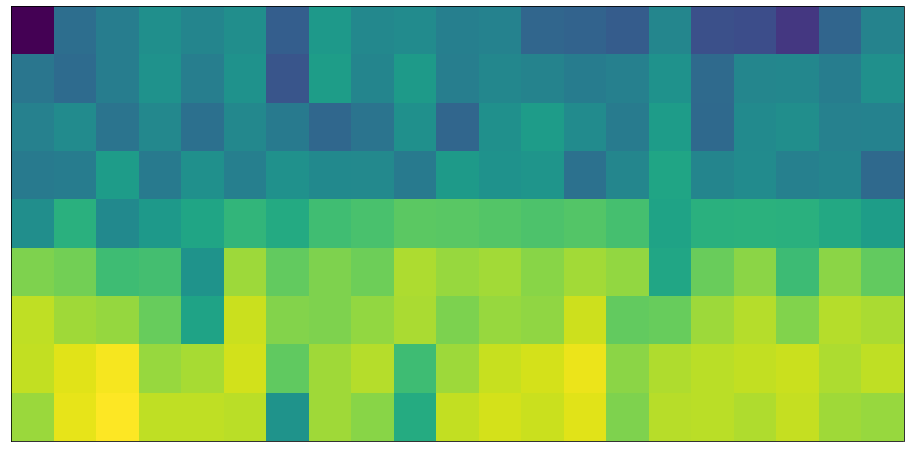

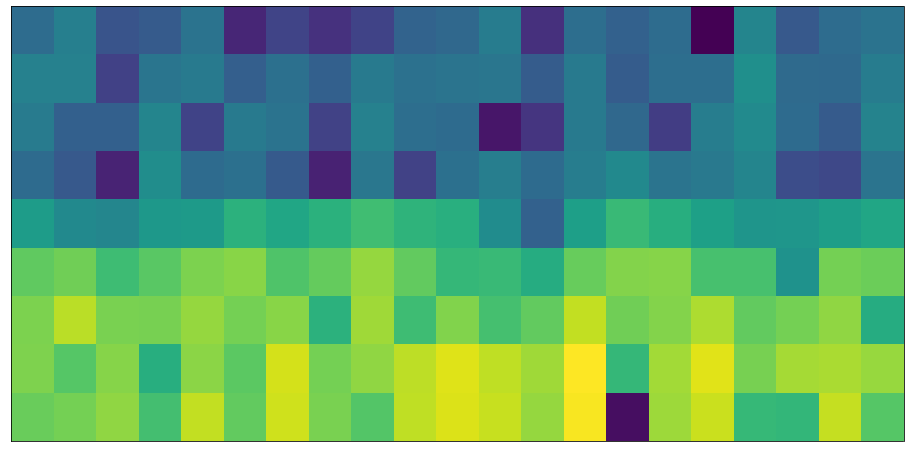

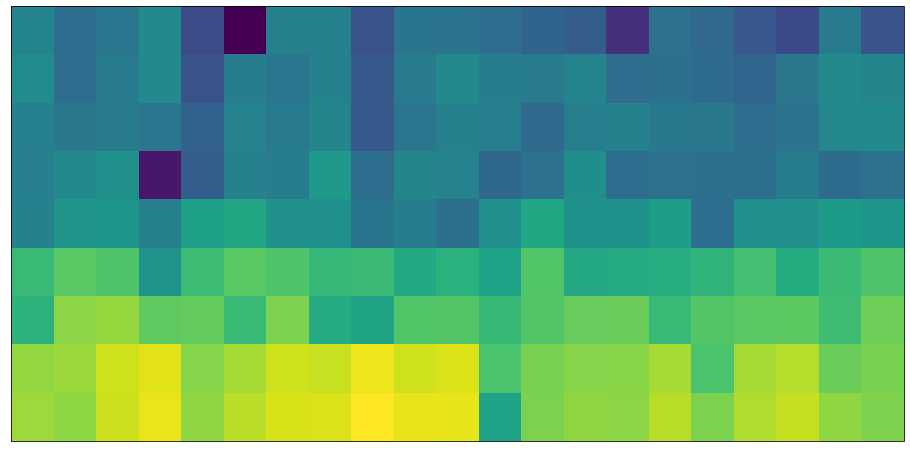

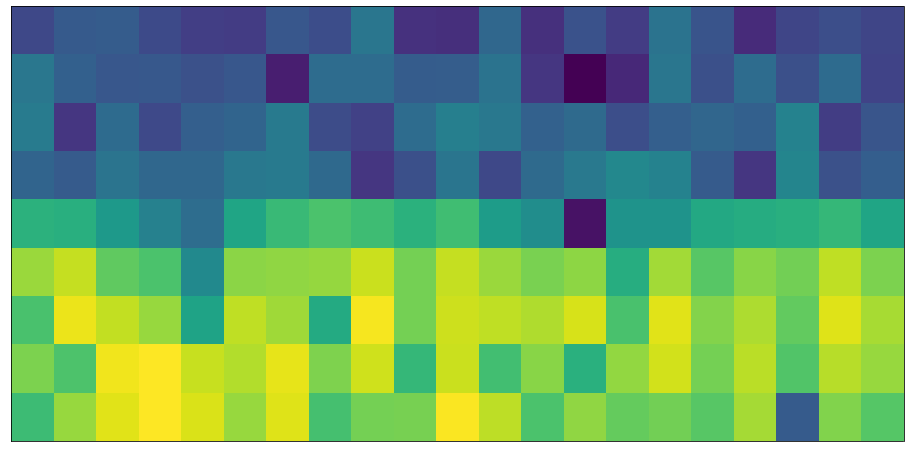

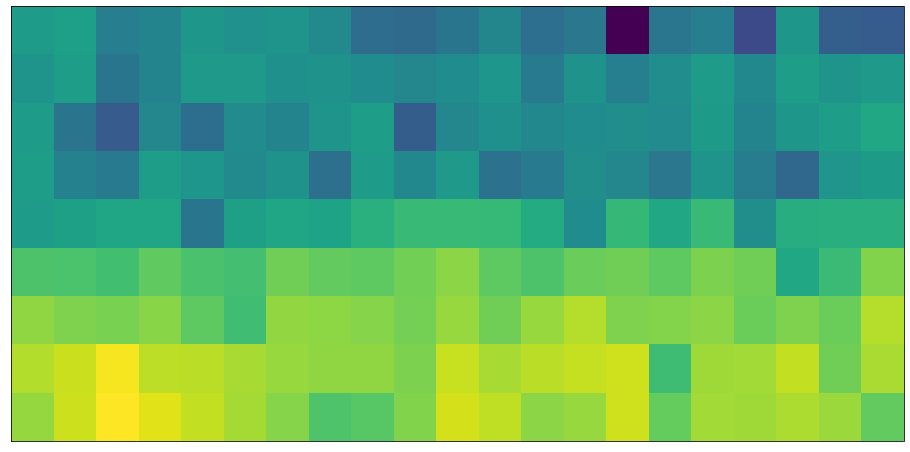

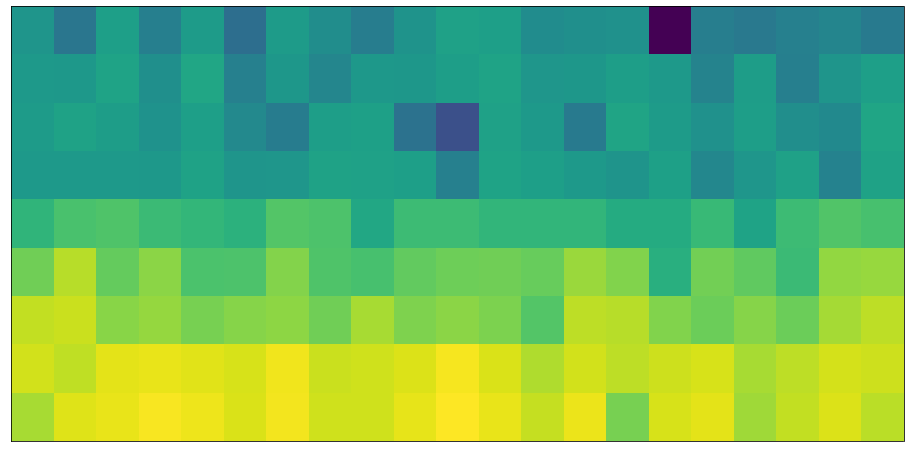

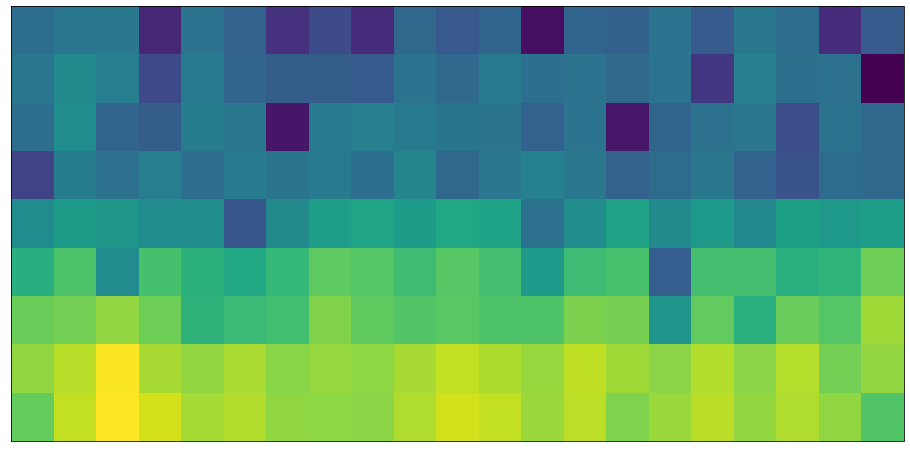

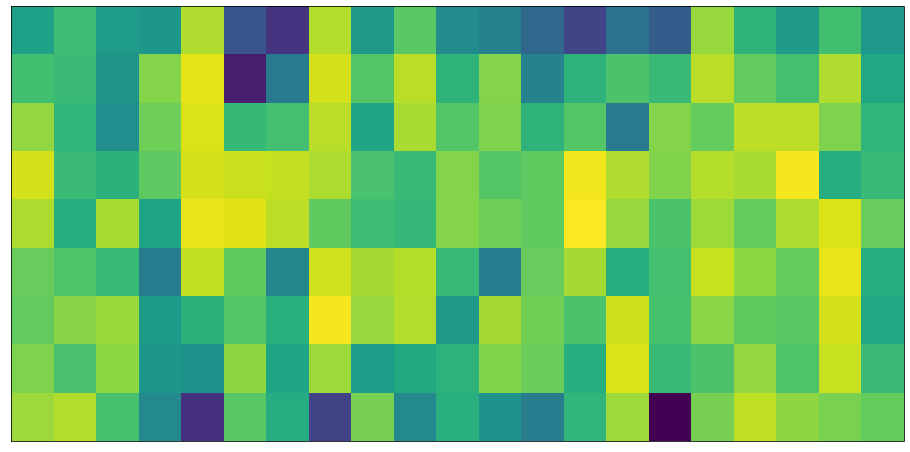

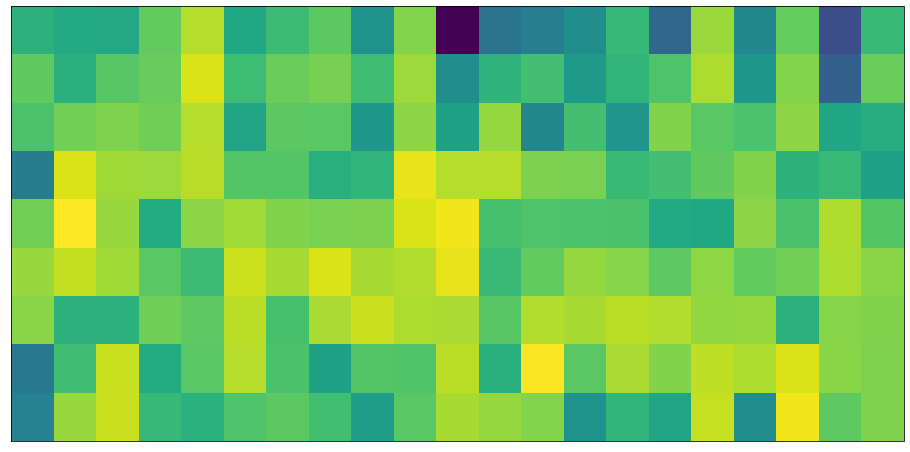

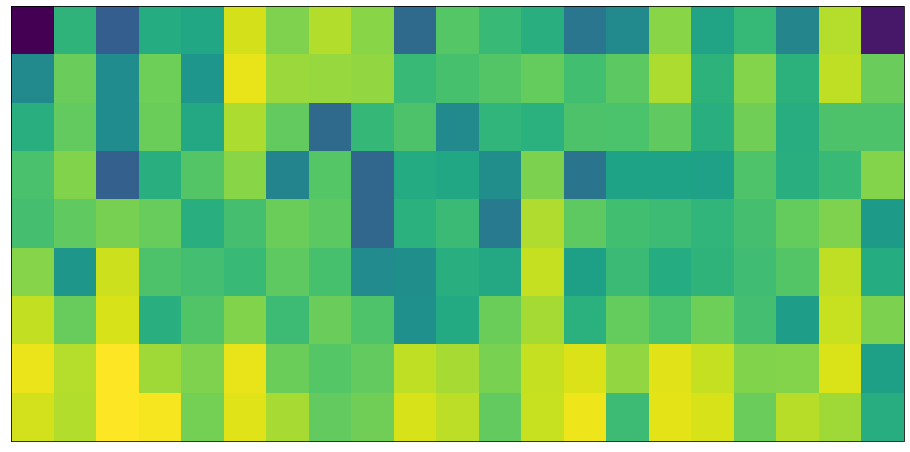

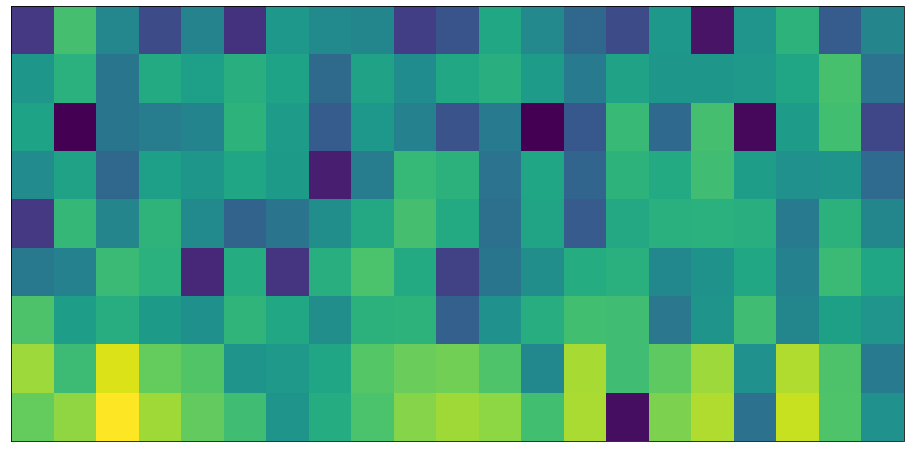

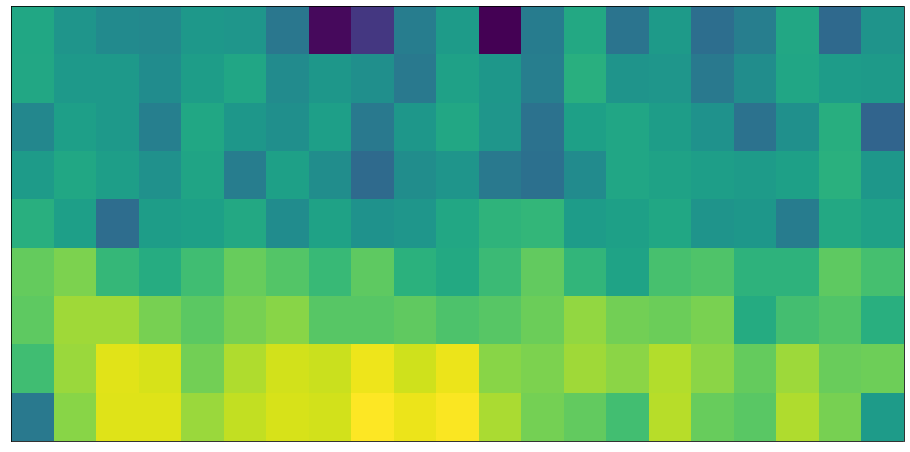

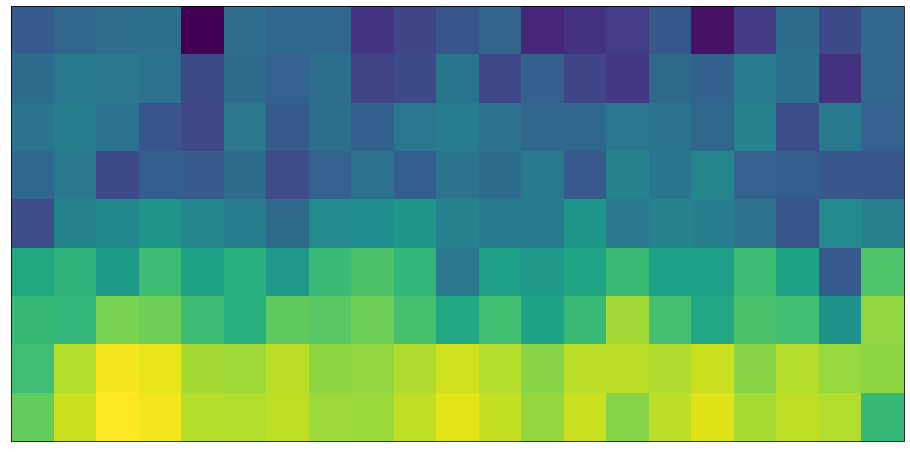

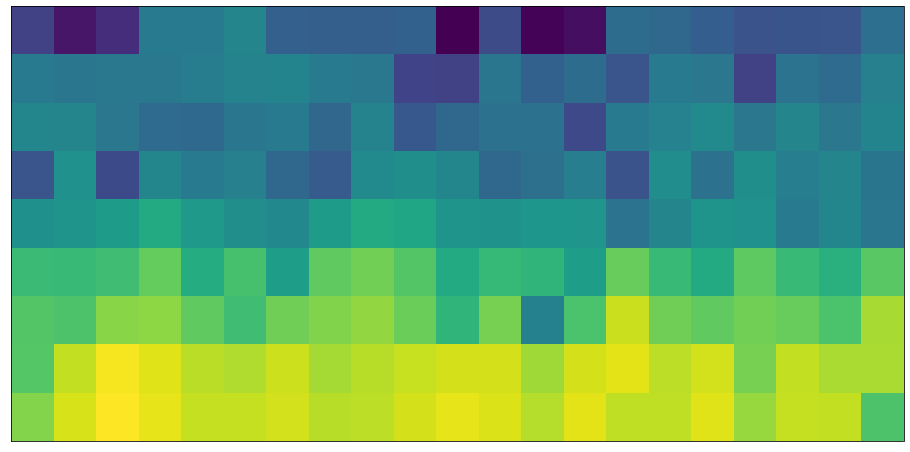

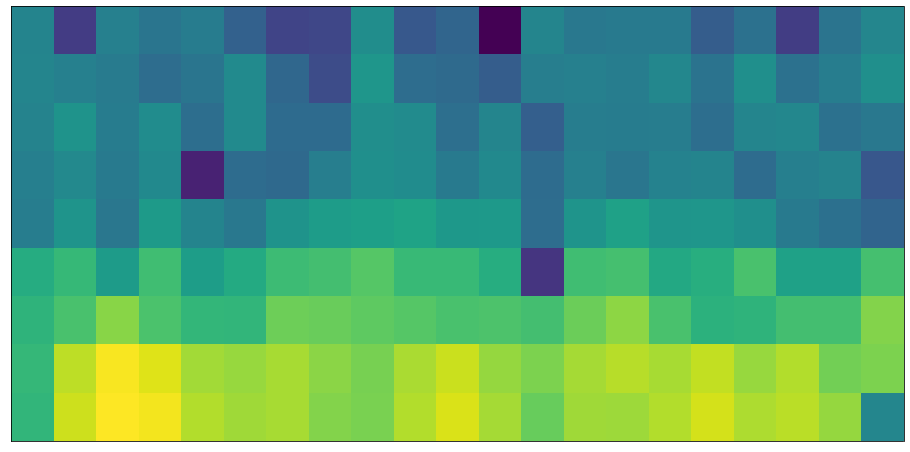

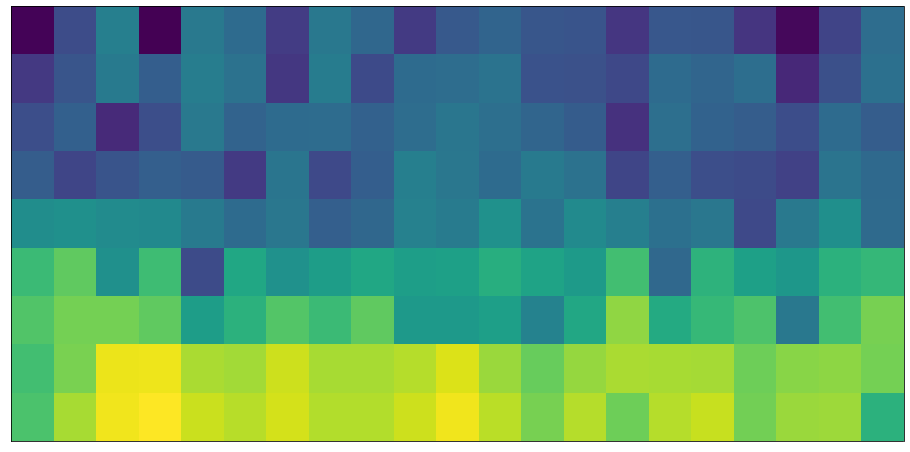

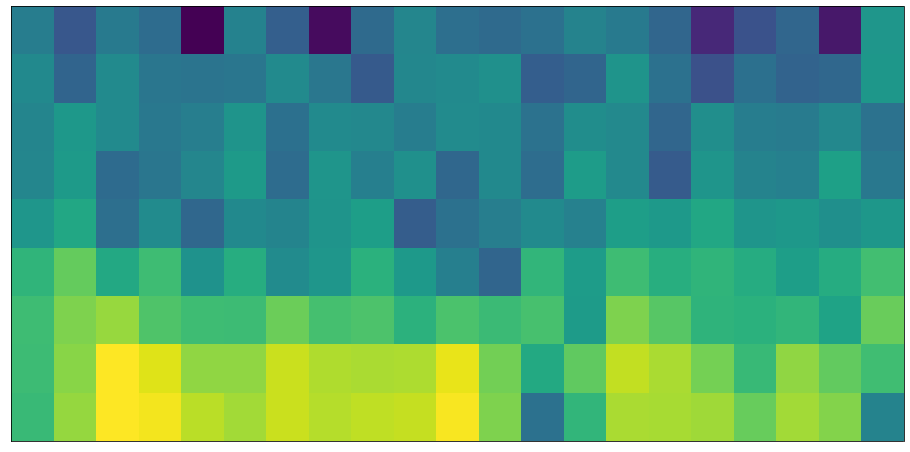

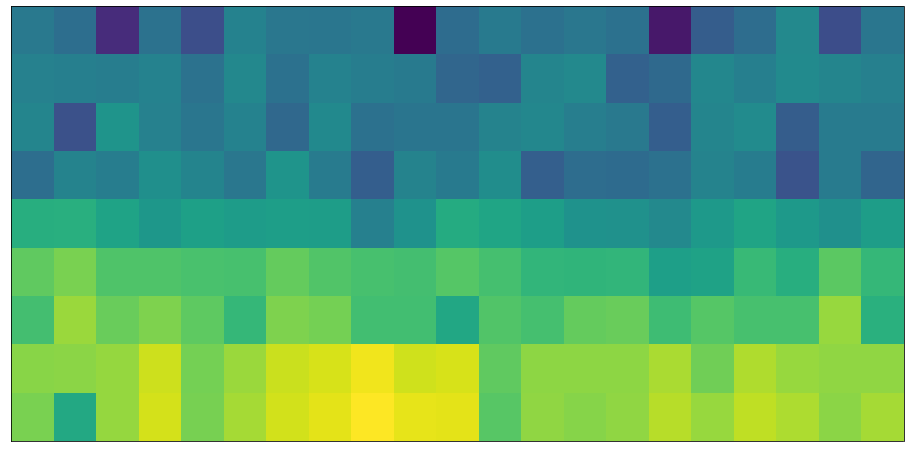

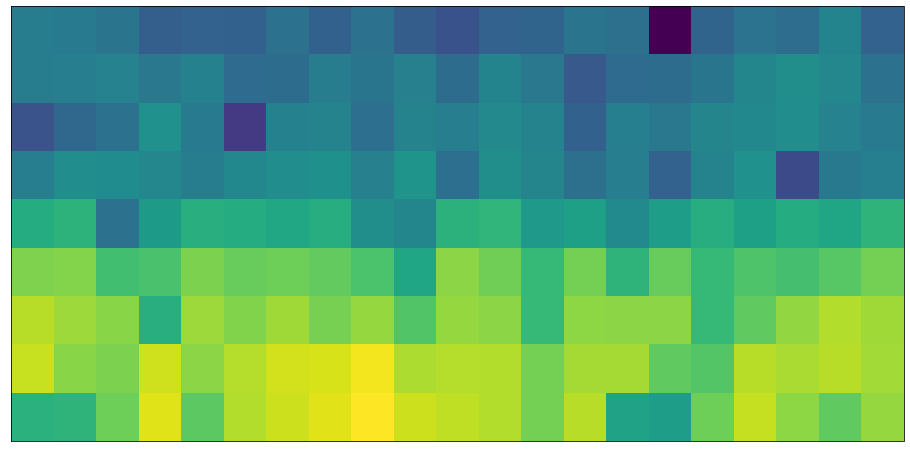

In [8]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import pandas as pd



def convert_csv(filename,sample_number=256,sensor_position='sensor position',sensor_value='sensor value',Fs=200):

    raw=pd.read_csv(filename)
    channel=raw[sensor_position].unique()
    data = np.empty((0,sample_number))
    for i in channel:
        mask=raw[sensor_position]==i
        data=np.append(data,np.array([raw[mask][sensor_value]]),axis=0)
    info=mne.create_info(ch_names=list(channel),sfreq=Fs)
    R_raw=mne.io.RawArray(data,info)
    return R_raw

raw_csv=pd.read_csv('D:\Dataset\EEG\Data'+'1'+'.csv')
eeg_channel=raw_csv['sensor position'].unique()
raw=convert_csv('D:\Dataset\EEG\Data'+'1'+'.csv')

raw=convert_csv('D:\Dataset\EEG\Data1.csv')
for i in eeg_channel:
    x=raw.get_data(i)
    x=x.reshape(-1,)
    print(x.shape)
    fig, ax = plt.subplots(figsize=(16,8))
    ax.specgram(x,NFFT=16,Fs=100,noverlap=int(8*0.5))
    ax.set_ylim([0,50])
    ax.set_ylabel("Frequency(Hz)")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.savefig('D:\Dataset\EEG_spectrogram\\'+str(i)+'.png',bbox_inches='tight', pad_inches=0)


    

In [41]:
import cv2
import numpy as np

final_img=np.empty((3504, 896, 3))
img=np.empty((438, 896, 3))
count=0
for i in eeg_channel:
    if img[1,1,1]==0:
        img=cv2.imread('D:\Dataset\EEG_spectrogram\\'+str(i)+'.png')
        count=count+1
        continue
    
    new_img=cv2.imread('D:\Dataset\EEG_spectrogram\\'+str(i)+'.png')
    img=np.concatenate([img,new_img],axis=0)
    count=count+1
    if (count)%8==0:
        if final_img[1,1,1]==0:
            final_img=img
            img=np.empty((438, 896, 3))
        else:
            final_img=np.concatenate([final_img,img],axis=1)
            img=np.empty((438, 896, 3))


In [47]:
cv2.imwrite('D:\Dataset\EEG_spectrogram\\final1.png',final_img)

True

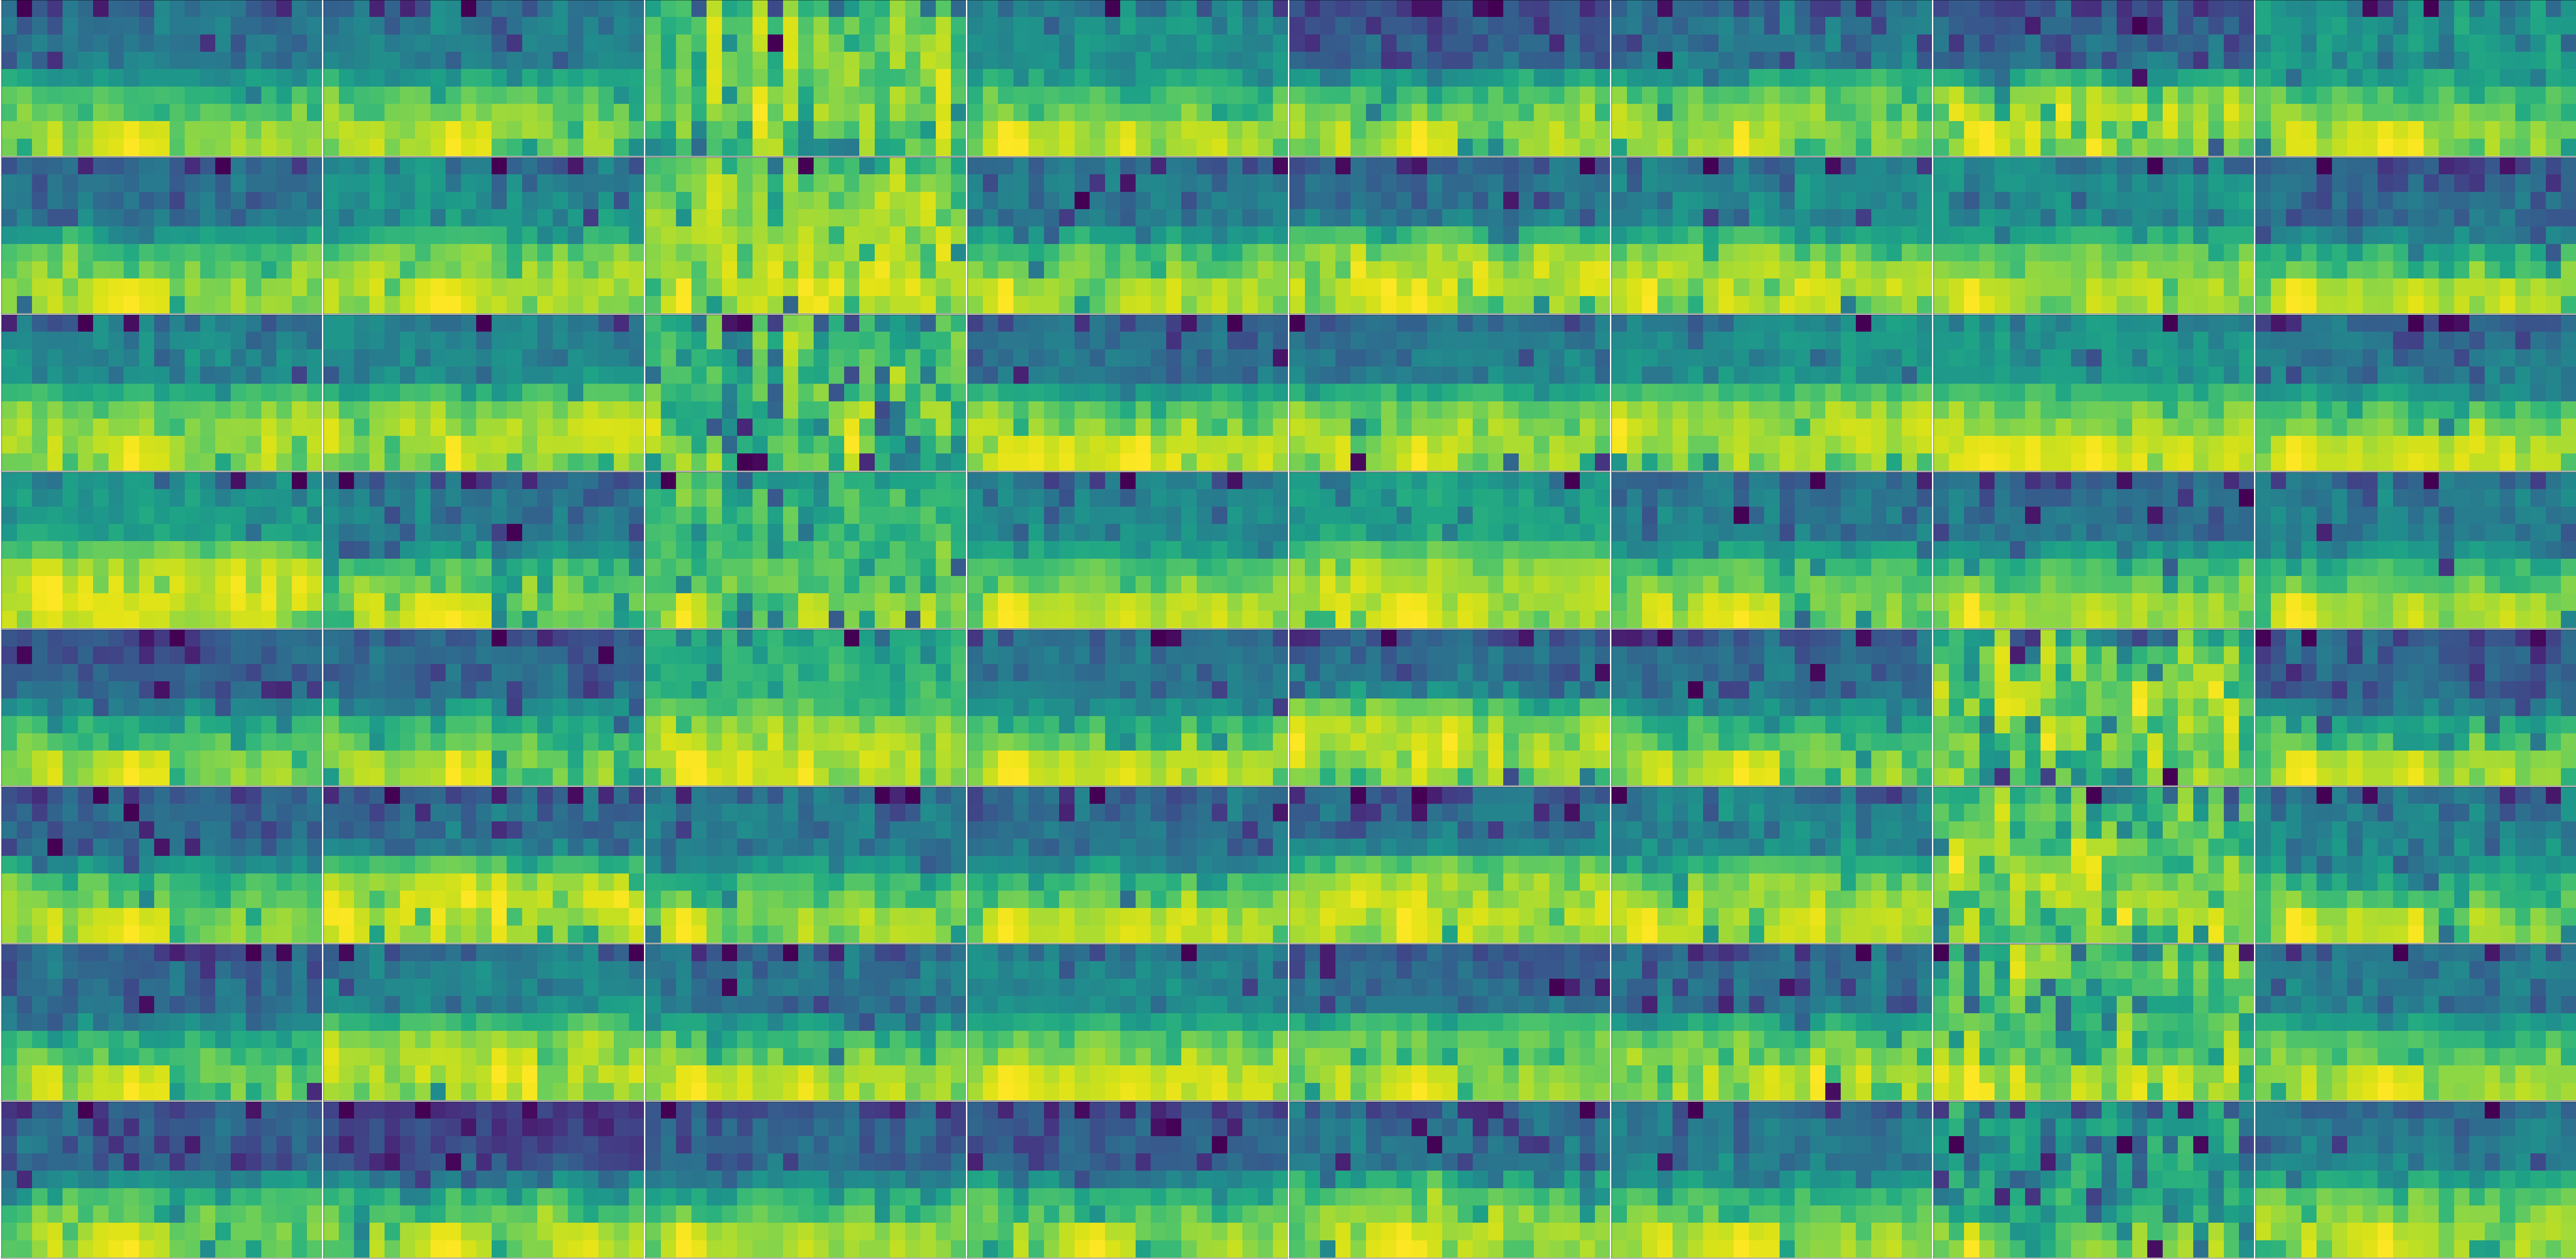

In [48]:
from IPython.display import Image
Image("D:\Dataset\EEG_spectrogram\\final1.png")